<table align="center">
  <td align="center"><a target="_blank" href="http://introtodeeplearning.com">
        <img src="https://i.ibb.co/Jr88sn2/mit.png" style="padding-bottom:5px;" />
      Visit MIT Deep Learning</a></td>
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/aamini/introtodeeplearning/blob/master/lab2/Part1_MNIST.ipynb">
        <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/aamini/introtodeeplearning/blob/master/lab2/Part1_MNIST.ipynb">
        <img src="https://i.ibb.co/xfJbPmL/github.png"  height="70px" style="padding-bottom:5px;"  />View Source on GitHub</a></td>
</table>

# Copyright Information

In [1]:
# Copyright 2021 MIT 6.S191 Introduction to Deep Learning. All Rights Reserved.
# 
# Licensed under the MIT License. You may not use this file except in compliance
# with the License. Use and/or modification of this code outside of 6.S191 must
# reference:
#
# © MIT 6.S191: Introduction to Deep Learning
# http://introtodeeplearning.com
#

# Laboratory 2: Computer Vision

# Part 1: MNIST Digit Classification

In the first portion of this lab, we will build and train a convolutional neural network (CNN) for classification of handwritten digits from the famous [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. The MNIST dataset consists of 60,000 training images and 10,000 test images. Our classes are the digits 0-9.

First, let's download the course repository, install dependencies, and import the relevant packages we'll need for this lab.

이번 실습의 첫번째 파트에서는 유명한 MNIST 데이터셋을 사용하여 손으로 쓴 숫자를 분류하는 CNN을 구축하고 훈련할 것입니다. MINIST 데이터셋은 60,000개의 훈련용 이미지와 10,000개의 테스트용 이미지로 구성되어 있습니다. 그리고 분류 클래스(class)는 숫자로 0~9가 됩니다. 

먼저, cousre 저장소를 다운로드하고, 필요한 것들을 설치한 다음, 실습에 필요한 관련 패키지를 불러와봅시다. 

In [7]:
# Import Tensorflow 2.0
#%tensorflow_version 2.x
import tensorflow as tf 

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
#assert len(tf.config.list_physical_devices('GPU')) > 0

## 1.1 MNIST dataset 

Let's download and load the dataset and display a few random samples from it:

데이터 셋을 다운로드하고 몇 개의 랜덤 샘플을 띄워봅시다. 

In [8]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11501568/11490434 [==============================] - 2s 0us/step


Our training set is made up of 28x28 grayscale images of handwritten digits. 

Let's visualize what some of these images and their corresponding training labels look like.

우리의 훈련 데이터 셋은 손으로 쓴 숫자의 28x28크기 회색(grayscale)조 이미지로 구성되어 있습니다. 

이 이미지 중 일부와 이미지에 해당하는 레이블(label)이 어떻게 생겼는지 시각화해봅시다. 

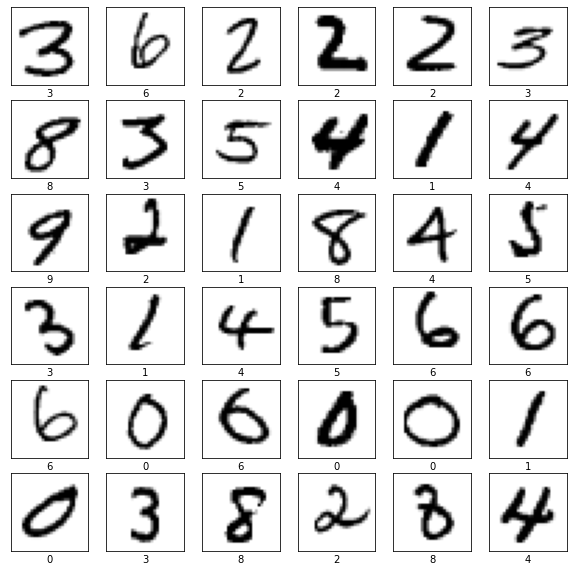

In [9]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

## 1.2 Neural Network for Handwritten Digit Classification

We'll first build a simple neural network consisting of two fully connected layers and apply this to the digit classification task. Our network will ultimately output a probability distribution over the 10 digit classes (0-9). This first architecture we will be building is depicted below:

![alt_text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab2/img/mnist_2layers_arch.png "CNN Architecture for MNIST Classification")


먼저 두 개의 fully connected layers로 구성된 간단한 신경망을 구축하고 이를 숫자 분류 작업에 적용해보겠습니다. 신경망은 궁극적으로 10개의 숫자 클래스(0-9)에 대한 확률 분포를 출력할 것입니다. 구축할 첫 번째 아키텍처는 다음과 같습니다. 

### Fully connected neural network architecture
To define the architecture of this first fully connected neural network, we'll once again use the Keras API and define the model using the [`Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential) class. Note how we first use a [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) layer, which flattens the input so that it can be fed into the model. 

In this next block, you'll define the fully connected layers of this simple work.

첫 번째 fully connected 신경망을 정의하기 위해, 다시 한번 KerasAPI를 사용할 것이며  [`Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential) class를 사용하여 모델을 정의할 것입니다. 처음으로 [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) 레이어를 사용할 것인데, 이 레이어는 입력을 퍼뜨려서(flatten) 모델에 들어갈 수 있게 합니다. 

다음 코드 블록에서, 여러분들은 이 간단한 작업을 위한 fully connected layer를 정의할 것입니다. 

In [12]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      # First define a Flatten layer
      tf.keras.layers.Flatten(),

      # '''TODO: Define the activation function for the first fully connected (Dense) layer.'''
      tf.keras.layers.Dense(128, activation=tf.nn.relu),

      # '''TODO: Define the second Dense layer to output the classification probabilities'''
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  return fc_model

model = build_fc_model()

As we progress through this next portion, you may find that you'll want to make changes to the architecture defined above. **Note that in order to update the model later on, you'll need to re-run the above cell to re-initialize the model.**

이 다음 부분을 진행하면서 위에서 정의한 아키텍처를 변경해야 할 수도 있습니다. **나중에 모델을 업데이트하려면 위의 셀을 다시 실행하여 모델을 다시 초기화해야 합니다.** 

Let's take a step back and think about the network we've just created. The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a 2d-array (28 x 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. You can think of this layer as unstacking rows of pixels in the image and lining them up. There are no learned parameters in this layer; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are fully-connected neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer (which you've defined!) should return an array of probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the handwritten digit classes.

That defines our fully connected model! 

한 발짝 물러서서 우리가 방금 만든 신경망에 대해 생각해 봅시다. 신경망의 첫 번째 레이어,  `tf.keras.layers.Flatten`, 는 2d-array(28x28 pixels)의 이미지를 1d-array(28x28=784pixels)로 변환해줍니다. 해당 레이어가 이미지의 픽셀 행을 분할하여 정렬하는 것이라고 생각하셔도 됩니다. 그렇기에 해당 레이어에서는 학습하는 파라미터가 없습니다. 단지 데이터의 형석을 다시 포맷하는 것이죠. 

픽셀을 퍼뜨린 후(flattend), 신경망은 두 개의 `tf.keras.layers.Dense` 레이어 시퀀스로 구성됩니다. 이것들은 fully-conneceted neural layers 입니다. 첫 번째 `Dense`레이어는 128개의 노드(또는 뉴런)을 가지고 있고, 두 번째(또는 마지막) 레이어는(여러분들이 직접 정의한!) 합계가 1인 확률 점수의 array 형태로 반환해야만 합니다. 각각의 노드는 현재 이미지가 필기된 숫자 클래스 중 어느 하나에 속할지에 대한 확률을 나타내는 점수를 포함하는 것입니다. 

그럼 fully connected 모델을 정의해봅시다! 



### Compile the model

Before training the model, we need to define a few more settings. These are added during the model's [`compile`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#compile) step:

* *Loss function* — This defines how we measure how accurate the model is during training. As was covered in lecture, during training we want to minimize this function, which will "steer" the model in the right direction.
* *Optimizer* — This defines how the model is updated based on the data it sees and its loss function.
* *Metrics* — Here we can define metrics used to monitor the training and testing steps. In this example, we'll look at the *accuracy*, the fraction of the images that are correctly classified.

We'll start out by using a stochastic gradient descent (SGD) optimizer initialized with a learning rate of 0.1. Since we are performing a categorical classification task, we'll want to use the [cross entropy loss](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/sparse_categorical_crossentropy).

You'll want to experiment with both the choice of optimizer and learning rate and evaluate how these affect the accuracy of the trained model. 

모델을 훈련하기 전에, 몇 가지를 좀 더 세팅해야 합니다. 아래 사항들을 모델  [`compile`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#compile) 단계에 추가합니다. 

* *loss function* - 손실 함수는 훈련 동안 모델이 얼마나 정확한지를 측정하는 방법을 정의합니다. 이번 강의에서 다뤘듯이, 우리는 훈련동안 해당 함수를 최소화하고자 하고, 이는 모델을 올바른 방향으로 이끌어(steer) 줄 것입니다. 
* *optimizer* - 옵티마이저는 모델이 보는 데이터와 손실 함수에 기반하여 어떻게 모델을 업데이트할지를 정의합니다. 
* *Metrics* - 여기서는 훈련 및 테스트 단계를 모니터링하는 데 사용할 매트릭스(평가 척도)를 정의할 수 있습니다. 이번 예제에서는 이미지가 얼마나 정확하게 분류되었는지를 확인하는 일부로 accuracy(정확도)를 사용할 것입니다. 

우리는 0.1 learning rate로 초기화된 SGD optimizer를 사용할 것입니다. 범주화된 분류 작업을 수행하고 있기 때문에 [cross entropy loss](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/sparse_categorical_crossentropy). loss를 사용할 것입니다. 

여러분들은 위 optimizer와 leraning rate 모두 사용해보고 실험해보면서 여러분들의 선택이 훈련 모델의 accuracy에 어떤 영향을 미치는지 평가해 볼 수 있습니다. 

In [13]:
'''TODO: Experiment with different optimizers and learning rates. How do these affect
    the accuracy of the trained model? Which optimizers and/or learning rates yield
    the best performance?'''
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

We're now ready to train our model, which will involve feeding the training data (`train_images` and `train_labels`) into the model, and then asking it to learn the associations between images and labels. We'll also need to define the batch size and the number of epochs, or iterations over the MNIST dataset, to use during training. 

In Lab 1, we saw how we can use `GradientTape` to optimize losses and train models with stochastic gradient descent. After defining the model settings in the `compile` step, we can also accomplish training by calling the [`fit`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#fit) method on an instance of the `Model` class. We will use this to train our fully connected model


이제 우리 모델을 훈련할 준비가 되었는데, 훈련 과정은 모델에 훈련 데이터(`train_images` 와 `train_labels`)를 집어 넣고 이미지와 레이블 사이의 연관성을 학습하길 요구합니다. 또한 훈련 중 사용할 batch 크기와 epochs 수, MINIST 데이터 셋에 대한 반복 횟수도 정의해야 합니다. 

Lab 1 에서, 우리는 loss를 최적화하고 stochastic gradient descent와 함께 모델을 훈련하기 위해 `GradientTape`를 사용하는 방법을 배웠습니다. '컴파일(compile)'단계에서 모델을 정의한 후, 'Model' 클래스의 인스턴스에서  [`fit`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#fit) 메서드를 호출하여 훈련을 수행할 수 있습니다. 우리는 이를 이용하여 우리의 fully connected 모델을 훈련할 겁니다. 

In [14]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 1s 693us/step - loss: 0.3772 - accuracy: 0.8949
Epoch 2/5
938/938 [==============================] - 1s 693us/step - loss: 0.2050 - accuracy: 0.9413
Epoch 3/5
938/938 [==============================] - 1s 680us/step - loss: 0.1549 - accuracy: 0.9556
Epoch 4/5
938/938 [==============================] - 1s 691us/step - loss: 0.1259 - accuracy: 0.9639
Epoch 5/5
938/938 [==============================] - 1s 680us/step - loss: 0.1048 - accuracy: 0.9701


As the model trains, the loss and accuracy metrics are displayed. With five epochs and a learning rate of 0.01, this fully connected model should achieve an accuracy of approximatley 0.97 (or 97%) on the training data.

모델이 훈련하면서 loss 및 accuracy metrics가 표시됩니다. 5epochs과 learning rate 0.01의 해당 fully connected 모델은 훈련 데이터에 대해 약 0.97(또는 97%) accyracy에 도달해야 합니다. 

### Evaluate accuracy on the test dataset

Now that we've trained the model, we can ask it to make predictions about a test set that it hasn't seen before. In this example, the `test_images` array comprises our test dataset. To evaluate accuracy, we can check to see if the model's predictions match the labels from the `test_labels` array. 

Use the [`evaluate`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#evaluate) method to evaluate the model on the test dataset!

이제 모델을 훈련했으니, 모델은 전에 본 적 없는 테스트 데이터셋에 대해 예측해보라고 해야 합니다. 이번 예제에서 `test_images` array는 우리의 테스트 데이터셋을 구성합니다. accuracy를 평가하기 위해 모델의 예측이 `test_labels` array의 레이블들과 일치하는지 확인해보아야 합니다. 

테스트 데이터셋에 대해 모델을 평가하기 위해서  [`evaluate`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#evaluate) 메서드를 사용해봅시다!

In [15]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 542us/step - loss: 0.1082 - accuracy: 0.9681
Test accuracy: 0.9681000113487244


You may observe that the accuracy on the test dataset is a little lower than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of *overfitting*, when a machine learning model performs worse on new data than on its training data. 

What is the highest accuracy you can achieve with this first fully connected model? Since the handwritten digit classification task is pretty straightforward, you may be wondering how we can do better...

![Deeper...](https://i.kym-cdn.com/photos/images/newsfeed/000/534/153/f87.jpg)

여러분들은 테스트 데이터셋의 accuracy가 훈련 데이터셋 accuracy보다 약간 더 낮은 것을 확인해볼 수 있을 것입니다. 훈련 accuracy와 테스트 accuracy 사이의 간극은 *과적합(overfitting)* 의 예시가 되는데, 과적합이란 머신러닝 모델이 훈련 데이터 셋에 비해 새로운 데이터에 대해 성능이 더 못미치는 경우를 말합니다. 

우리가 처음 만들어 낸 이 fully connected 모델이 이뤄낼 수 있는 가장 높은 accuracy는 무엇일까요? 손으로 쓴 숫자 분류 작업은 매우 간단하기 때문에, 여러분들은 우리가 어떻게 더 잘 할 수 있는지 궁금해 할 수 있으실 겁니다. (*더 깊게 들어갈 필요가 있겠구먼..*)

## 1.3 Convolutional Neural Network (CNN) for handwritten digit classification

As we saw in lecture, convolutional neural networks (CNNs) are particularly well-suited for a variety of tasks in computer vision, and have achieved near-perfect accuracies on the MNIST dataset. We will now build a CNN composed of two convolutional layers and pooling layers, followed by two fully connected layers, and ultimately output a probability distribution over the 10 digit classes (0-9). The CNN we will be building is depicted below:

![alt_text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab2/img/convnet_fig.png "CNN Architecture for MNIST Classification")

강의에서 보았듯이, CNN은 computer vision의 다양한 작업들에 적합하고, MINIST 데이터셋에 거의 완벽한 정확도를 달성해낼 수 있습니다. 우리는 2개의 convolutional 레이어와 pooling 레이어, 그 다음으로 2개의 fully connected 레이어로 구성되어 궁극적으로 10개의 숫자 클래스(0-9)에 대한 확률 분포를 출력하는 CNN을 구축할 것입니다. 우리가 구축할 CNN은 아래와 같습니다. 

### Define the CNN model

We'll use the same training and test datasets as before, and proceed similarly as our fully connected network to define and train our new CNN model. To do this we will explore two layers we have not encountered before: you can use  [`keras.layers.Conv2D` ](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) to define convolutional layers and [`keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) to define the pooling layers. Use the parameters shown in the network architecture above to define these layers and build the CNN model.

우리는 이전과 같은 동일한 훈련, 테스트 데이터셋을 사용할 것이며, 

In [ ]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # TODO: Define the first convolutional layer
        tf.keras.layers.Conv2D('''TODO'''), 

        # TODO: Define the first max pooling layer
        tf.keras.layers.MaxPool2D('''TODO'''),

        # TODO: Define the second convolutional layer
        tf.keras.layers.Conv2D('''TODO'''),

        # TODO: Define the second max pooling layer
        tf.keras.layers.MaxPool2D('''TODO'''),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # TODO: Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        '''TODO: Dense layer to output classification probabilities'''
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

### Train and test the CNN model

Now, as before, we can define the loss function, optimizer, and metrics through the `compile` method. Compile the CNN model with an optimizer and learning rate of choice:

In [ ]:
'''TODO: Define the compile operation with your optimizer and learning rate of choice'''
cnn_model.compile(optimizer='''TODO''', loss='''TODO''', metrics=['accuracy']) # TODO

As was the case with the fully connected model, we can train our CNN using the `fit` method via the Keras API.

In [ ]:
'''TODO: Use model.fit to train the CNN model, with the same batch_size and number of epochs previously used.'''
cnn_model.fit('''TODO''')

Great! Now that we've trained the model, let's evaluate it on the test dataset using the [`evaluate`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#evaluate) method:

In [ ]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = # TODO

print('Test accuracy:', test_acc)

What is the highest accuracy you're able to achieve using the CNN model, and how does the accuracy of the CNN model compare to the accuracy of the simple fully connected network? What optimizers and learning rates seem to be optimal for training the CNN model? 

### Make predictions with the CNN model

With the model trained, we can use it to make predictions about some images. The [`predict`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#predict) function call generates the output predictions given a set of input samples.


In [ ]:
predictions = cnn_model.predict(test_images)

With this function call, the model has predicted the label for each image in the testing set. Let's take a look at the prediction for the first image in the test dataset:

In [ ]:
predictions[0]

As you can see, a prediction is an array of 10 numbers. Recall that the output of our model is a probability distribution over the 10 digit classes. Thus, these numbers describe the model's "confidence" that the image corresponds to each of the 10 different digits. 

Let's look at the digit that has the highest confidence for the first image in the test dataset:

In [ ]:
'''TODO: identify the digit with the highest confidence prediction for the first
    image in the test dataset. '''
prediction = # TODO

print(prediction)

So, the model is most confident that this image is a "???". We can check the test label (remember, this is the true identity of the digit) to see if this prediction is correct:

In [ ]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

It is! Let's visualize the classification results on the MNIST dataset. We will plot images from the test dataset along with their predicted label, as well as a histogram that provides the prediction probabilities for each of the digits:

In [ ]:
#@title Change the slider to look at the model's predictions! { run: "auto" }

image_index = 79 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)

We can also plot several images along with their predictions, where correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent confidence (out of 100) for the predicted label. Note the model can be very confident in an incorrect prediction!

In [ ]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)


## 1.4 Training the model 2.0

Earlier in the lab, we used the [`fit`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#fit) function call to train the model. This function is quite high-level and intuitive, which is really useful for simpler models. As you may be able to tell, this function abstracts away many details in the training call, and we have less control over training model, which could be useful in other contexts. 

As an alternative to this, we can use the [`tf.GradientTape`](https://www.tensorflow.org/api_docs/python/tf/GradientTape) class to record differentiation operations during training, and then call the [`tf.GradientTape.gradient`](https://www.tensorflow.org/api_docs/python/tf/GradientTape#gradient) function to actually compute the gradients. You may recall seeing this in Lab 1 Part 1, but let's take another look at this here.

We'll use this framework to train our `cnn_model` using stochastic gradient descent.

In [ ]:
# Rebuild the CNN model
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95) # to record the evolution of the loss
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2) # define our optimizer

if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
  # First grab a batch of training data and convert the input images to tensors
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  # GradientTape to record differentiation operations
  with tf.GradientTape() as tape:
    #'''TODO: feed the images into the model and obtain the predictions'''
    logits = # TODO

    #'''TODO: compute the categorical cross entropy loss
    loss_value = tf.keras.backend.sparse_categorical_crossentropy() # TODO

  loss_history.append(loss_value.numpy().mean()) # append the loss to the loss_history record
  plotter.plot(loss_history.get())

  # Backpropagation
  '''TODO: Use the tape to compute the gradient against all parameters in the CNN model.
      Use cnn_model.trainable_variables to access these parameters.''' 
  grads = # TODO
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))


## 1.5 Conclusion
In this part of the lab, you had the chance to play with different MNIST classifiers with different architectures (fully-connected layers only, CNN), and experiment with how different hyperparameters affect accuracy (learning rate, etc.). The next part of the lab explores another application of CNNs, facial detection, and some drawbacks of AI systems in real world applications, like issues of bias. 